In [51]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


# Import the API key
from config import car_key
from config import car_secret_key


In [52]:
def linreg_plot(x_values, y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values[1], y_values[1])
    regress_values = x_values[1] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    x_quantile = np.percentile(x_values[1], [1])
    if slope > 0:
        y_quantile = np.percentile(y_values[1], [99])
    else:
        y_quantile = np.percentile(y_values[1], [1])
    print(f"The r^2-value is: {rvalue**2}")
    plt.scatter(x_values[1],y_values[1], color="#A345F5", marker = "+")
    plt.plot(x_values[1],regress_values,color="#FF8800")
    plt.annotate(line_eq,(x_quantile, y_quantile),fontsize=18,color="black",weight="bold")
    plt.title(f"{x_values[0]} vs {y_values[0]}")
    plt.xlabel(x_values[0])
    plt.ylabel(y_values[0])
    plt.show()

In [53]:

# search base URL
base_url = f"https://mc-api.marketcheck.com/v2/popular/cars?api_key={car_key}&car_type=new&country=us"


response = requests.get(base_url).json()
print(json.dumps(response, indent=4, sort_keys=True))


[
    {
        "count": 147239,
        "country": "us",
        "dom_stats": {
            "geometric_mean": 23,
            "iqr": 21,
            "listings_count": 0,
            "max": 1678,
            "mean": 30,
            "median": 25,
            "min": 1,
            "population_standard_deviation": 29,
            "standard_deviation": 29,
            "trimmed_mean": 26,
            "variance": 830
        },
        "make": "Toyota",
        "miles_stats": {
            "geometric_mean": 6,
            "iqr": 7,
            "listings_count": 38357,
            "max": 504639,
            "mean": 115,
            "median": 5,
            "min": 1,
            "population_standard_deviation": 3344,
            "standard_deviation": 3344,
            "trimmed_mean": 6,
            "variance": 11181495
        },
        "model": "RAV4",
        "price_stats": {
            "geometric_mean": 37486,
            "iqr": 6027,
            "listings_count": 140741,
            "max

In [54]:
top50_df = pd.DataFrame(response)
top50_df
# df_expanded = pd.concat([top50_df.drop(['price_stats'], axis=1), top50_df['price_stats'].apply(pd.Series)], axis=1)
# df_expanded = pd.concat([top50_df.drop(['miles_stats'], axis=1), top50_df['miles_stats'].apply(pd.Series)], axis=1)
# df_expanded = pd.concat([top50_df.drop(['dom_stats'], axis=1), top50_df['dom_stats'].apply(pd.Series)], axis=1)

# top50_df = pd.DataFrame(data_dict)

,country,count,make,model,price_stats,miles_stats,dom_stats
0,us,147239,Toyota,RAV4,"{'geometric_mean': 37486, 'listings_count': 14...","{'geometric_mean': 6, 'listings_count': 38357,...","{'geometric_mean': 23, 'listings_count': 0, 'm..."
1,us,114370,Honda,CR-V,"{'geometric_mean': 37521, 'listings_count': 10...","{'geometric_mean': 7, 'listings_count': 82694,...","{'geometric_mean': 28, 'listings_count': 0, 'm..."
2,us,104913,Chevrolet,Silverado 1500,"{'geometric_mean': 54238, 'listings_count': 10...","{'geometric_mean': 10, 'listings_count': 74583...","{'geometric_mean': 69, 'listings_count': 0, 'm..."
3,us,101915,Ford,F-150,"{'geometric_mean': 58675, 'listings_count': 95...","{'geometric_mean': 22, 'listings_count': 58319...","{'geometric_mean': 55, 'listings_count': 0, 'm..."
4,us,96011,Toyota,Camry,"{'geometric_mean': 34454, 'listings_count': 91...","{'geometric_mean': 6, 'listings_count': 23382,...","{'geometric_mean': 20, 'listings_count': 0, 'm..."
5,us,76723,Toyota,Tacoma,"{'geometric_mean': 46629, 'listings_count': 73...","{'geometric_mean': 6, 'listings_count': 19045,...","{'geometric_mean': 30, 'listings_count': 0, 'm..."
6,us,68050,Toyota,Tundra,"{'geometric_mean': 62544, 'listings_count': 65...","{'geometric_mean': 6, 'listings_count': 19589,...","{'geometric_mean': 37, 'listings_count': 0, 'm..."
7,us,67199,Toyota,Corolla,"{'geometric_mean': 25304, 'listings_count': 64...","{'geometric_mean': 5, 'listings_count': 15683,...","{'geometric_mean': 22, 'listings_count': 0, 'm..."
8,us,61216,Chevrolet,Trax,"{'geometric_mean': 24852, 'listings_count': 57...","{'geometric_mean': 7, 'listings_count': 40388,...","{'geometric_mean': 30, 'listings_count': 0, 'm..."
9,us,49754,Hyundai,Tucson,"{'geometric_mean': 35024, 'listings_count': 48...","{'geometric_mean': 12, 'listings_count': 36008...","{'geometric_mean': 52, 'listings_count': 0, 'm..."


In [55]:
df_expanded = pd.concat([top50_df.drop(['price_stats'], axis=1), top50_df['price_stats'].apply(pd.Series)], axis=1)
df_expanded = df_expanded.drop("miles_stats", axis=1)
df_expanded = df_expanded.drop("dom_stats", axis=1)
df_expanded

,country,count,make,model,geometric_mean,listings_count,min,median,population_standard_deviation,variance,max,mean,trimmed_mean,standard_deviation,iqr
0,us,147239,Toyota,RAV4,37486,140741,7995,36894,4991,24909423,63313,37796,37290,4991,6027
1,us,114370,Honda,CR-V,37521,106827,5297,37850,3298,10878186,403550,37653,37698,3298,4200
2,us,104913,Chevrolet,Silverado 1500,54238,102301,5995,54495,10535,110989521,1032750,55070,54784,10535,13615
3,us,101915,Ford,F-150,58675,95885,6495,57573,14830,219917760,225000,60245,58674,14830,16477
4,us,96011,Toyota,Camry,34454,91901,5999,34175,3848,14807014,80350,34665,34496,3848,5225
5,us,76723,Toyota,Tacoma,46629,73580,11289,46527,5750,33067248,85865,46975,46816,5750,7556
6,us,68050,Toyota,Tundra,62544,65741,6950,62641,7849,61602769,324849,63022,62735,7849,11012
7,us,67199,Toyota,Corolla,25304,64459,9995,24817,2311,5338809,278478,25388,25168,2311,2784
8,us,61216,Chevrolet,Trax,24852,57642,9500,24985,2148,4615625,256230,24916,24967,2148,2595
9,us,49754,Hyundai,Tucson,35024,48514,11018,34735,4305,18533646,345550,35260,35135,4305,5737


(-1.0999984402033447,
 1.0999999090494894,
 -1.0999991497036314,
 1.0999999595050425)

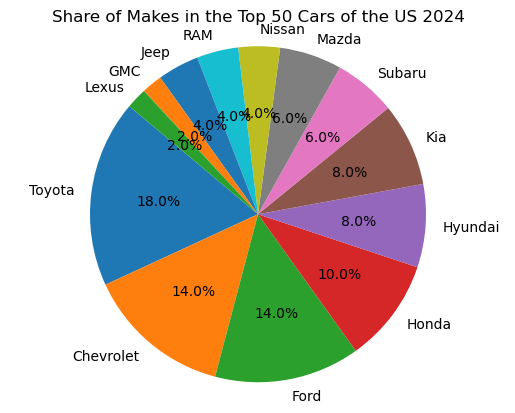

In [56]:
Make_top_50 = df_expanded['make'].value_counts()
Make_top_50
plt.title("Share of Makes in the Top 50 Cars of the US 2024")
plt.pie(Make_top_50, labels=Make_top_50.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 

<Figure size 1000x600 with 0 Axes>

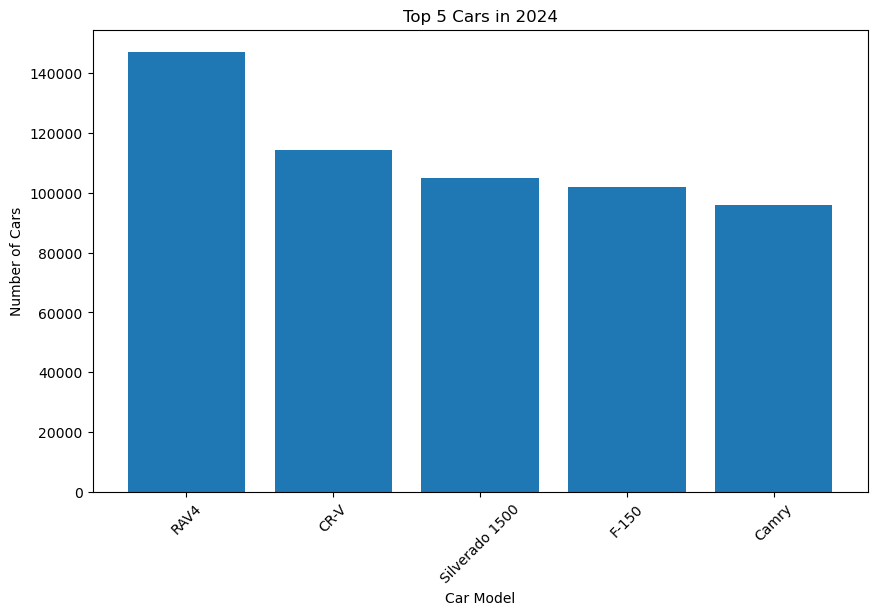

In [57]:
plt.figure(figsize=(10, 6))  # Set the figure size
top_5_cars = df_expanded.head(5)  # Select the top 5 cars

plt.figure(figsize=(10, 6))  # Set the figure size

plt.bar(top_5_cars['model'], top_5_cars['count'])  # Create the bar chart for the top 5 cars

plt.xlabel('Car Model')  # Set the x-axis label
plt.ylabel('Number of Cars')  # Set the y-axis label
plt.title('Top 5 Cars in 2024')  # Set the title

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()  # Display the plot

In [58]:
cars_clean_df = pd.read_csv('Resources/car_sales_clean.csv')
cars_clean_df


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Sedan
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Sedan
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT),Sedan
472321,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Truck
472322,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),SUV
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),Sedan


In [69]:
df_by_year = {year: group for year, group in cars_clean_df.groupby('year')}

     
    



In [82]:
#Data Analysis for Car Sales in 2010
# Dropping columns from the DataFrame
car_sales_2005_df = df_by_year[2005][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2005_df
car_sales_2005_df["make"].value_counts()


make
Chevrolet        2439
Ford             1927
Nissan           1446
Dodge            1325
Toyota           1089
Honda             932
Chrysler          862
Jeep              632
BMW               594
GMC               522
Mercedes-Benz     518
Cadillac          467
Hyundai           374
Pontiac           347
Acura             336
Volkswagen        324
Buick             307
Kia               290
Infiniti          267
Volvo             264
Mazda             249
Audi              217
Lexus             195
Saturn            182
Mercury           168
Subaru            142
MINI              112
Lincoln           110
Mitsubishi        102
Jaguar             86
HUMMER             78
Saab               60
Suzuki             59
Porsche            55
Scion              53
Bentley            18
Land Rover          8
Isuzu               7
Maserati            6
Name: count, dtype: int64

In [83]:
car_sales_2006_df = df_by_year[2006][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2006_df
car_sales_2006_df["make"].value_counts()

make
Chevrolet        2521
Ford             2458
Nissan           1504
Dodge            1446
Toyota           1272
BMW              1260
Chrysler         1140
Honda             978
Mercedes-Benz     950
Jeep              788
Pontiac           659
Volkswagen        645
Cadillac          593
Hyundai           543
Lexus             518
Kia               402
GMC               390
Infiniti          373
Acura             358
Buick             309
Audi              266
HUMMER            245
Saturn            242
Lincoln           222
Mercury           204
Volvo             197
Subaru            195
Mazda             182
Mitsubishi        171
MINI              139
Suzuki            108
Porsche           102
Saab               77
Scion              59
Jaguar             57
Bentley            20
Isuzu              18
Maserati           17
Aston Martin        3
Name: count, dtype: int64

In [84]:
car_sales_2007_df = df_by_year[2007][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2007_df
car_sales_2007_df["make"].value_counts()

make
Chevrolet        3598
Ford             2563
Toyota           1882
Dodge            1583
Nissan           1486
Honda            1478
BMW              1296
Chrysler         1237
Jeep             1060
GMC               918
Mercedes-Benz     890
Cadillac          814
Lexus             786
Pontiac           733
Volkswagen        555
Hyundai           533
Saturn            502
Audi              383
Kia               340
Acura             325
Buick             290
Infiniti          262
Mitsubishi        224
Volvo             214
Lincoln           209
HUMMER            179
Suzuki            177
Scion             150
MINI              144
Mercury           140
Mazda             123
Subaru            100
Saab               56
Jaguar             52
Porsche            39
Bentley            21
Maserati           12
Aston Martin       12
Isuzu               7
Lamborghini         3
Lotus               1
Ferrari             1
Name: count, dtype: int64

In [85]:
car_sales_2008_df = df_by_year[2008][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2008_df
car_sales_2008_df["make"].value_counts()

make
Chevrolet        3669
Ford             3237
Dodge            2053
Honda            1537
Toyota           1533
BMW              1483
Chrysler         1197
Nissan           1191
Mercedes-Benz    1088
Jeep             1054
GMC               906
Pontiac           729
Lexus             652
Cadillac          575
Saturn            566
Hyundai           484
Kia               464
Mazda             438
Volkswagen        427
Buick             401
Audi              383
Infiniti          369
Acura             274
Scion             264
Land Rover        257
Mercury           240
Mitsubishi        222
Suzuki            206
Subaru            200
Lincoln           199
Volvo             177
MINI              171
HUMMER            122
Porsche            94
Saab               44
smart              34
Jaguar             32
Maserati           17
Bentley            13
Aston Martin        5
Isuzu               3
Ferrari             1
Name: count, dtype: int64

In [74]:
car_sales_2009_df = df_by_year[2009][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2009_df

,year,make,model,state,color,mmr,sellingprice,saledate,type
2455,2009,Acura,MDX,ca,white,18550.0,18250.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST),SUV
2462,2009,Acura,TL,ca,blue,16350.0,18200.0,Fri Dec 26 2014 15:00:00 GMT-0800 (PST),Sedan
2480,2009,Acura,MDX,ca,silver,14750.0,13000.0,Wed Feb 04 2015 04:30:00 GMT-0800 (PST),SUV
2515,2009,Audi,A3,ca,black,11800.0,14250.0,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),Wagon
2572,2009,Nissan,Maxima,ca,black,12100.0,10700.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),Sedan
...,...,...,...,...,...,...,...,...,...
472239,2009,Jeep,Wrangler,nv,white,23100.0,17500.0,Fri Jun 19 2015 05:00:00 GMT-0700 (PDT),SUV
472262,2009,Jeep,Compass,oh,blue,6900.0,6300.0,Tue Jun 30 2015 06:30:00 GMT-0700 (PDT),SUV
472270,2009,Nissan,Sentra,mo,blue,5125.0,5700.0,Tue Jun 23 2015 04:00:00 GMT-0700 (PDT),Sedan
472271,2009,Pontiac,G8,mo,red,29600.0,26500.0,Wed Jun 24 2015 03:30:00 GMT-0700 (PDT),Sedan


In [81]:
car_sales_2010_df = df_by_year[2010][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2010_df
car_sales_2010_df["make"].value_counts()

make
Ford             3534
Chevrolet        3347
Dodge            2421
Toyota           1991
Honda            1313
Nissan           1271
Hyundai           740
Mercedes-Benz     738
Jeep              730
Chrysler          724
Kia               621
GMC               587
Mazda             551
Volkswagen        532
BMW               491
Lexus             483
Cadillac          331
Buick             253
Audi              236
Acura             201
Lincoln           186
Subaru            165
Mitsubishi        165
MINI              147
Mercury           137
Infiniti          135
Volvo             135
Land Rover        111
Scion              95
Pontiac            65
Suzuki             64
Porsche            44
Jaguar             41
Saab                9
Ferrari             6
smart               6
Rolls-Royce         3
HUMMER              3
Bentley             2
Maserati            2
Name: count, dtype: int64

In [86]:
car_sales_2011_df = df_by_year[2011][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2011_df
car_sales_2011_df['make'].value_counts()

make
Ford             6685
Chevrolet        4892
Nissan           4825
Toyota           3829
Infiniti         2633
BMW              2215
Honda            1563
Dodge            1476
Hyundai          1440
Mercedes-Benz    1310
Kia              1185
Jeep             1171
Mazda             998
GMC               925
Lexus             893
Ram               643
Cadillac          583
Volkswagen        507
Chrysler          470
Subaru            424
Buick             379
Audi              347
Lincoln           325
Mitsubishi        290
Land Rover        285
Jaguar            217
Acura             210
MINI              201
Volvo             122
Porsche           107
Scion             100
Suzuki             63
Mercury            28
Saab               11
smart              10
Rolls-Royce         9
Maserati            7
Bentley             3
Aston Martin        2
Ferrari             1
Name: count, dtype: int64

In [87]:
car_sales_2012_df = df_by_year[2012][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2012_df
car_sales_2012_df["make"].value_counts()

make
Ford             14640
Nissan           13785
Honda             7994
Toyota            6675
Chevrolet         6359
Infiniti          4106
BMW               3720
Hyundai           3459
Dodge             2742
Mercedes-Benz     2641
Volkswagen        2503
Lexus             2491
Kia               2180
Jeep              1941
Chrysler          1314
Acura             1183
MINI              1050
Mazda             1047
GMC               1025
Ram               1025
Audi               956
Lincoln            923
Cadillac           652
Buick              472
Subaru             454
Scion              398
Volvo              301
Mitsubishi         288
Land Rover         218
Porsche            205
FIAT               202
Jaguar             149
smart              139
Suzuki             100
Maserati            12
Bentley             12
Fisker               9
Ferrari              7
Rolls-Royce          3
Name: count, dtype: int64

In [88]:
car_sales_2013_df = df_by_year[2013][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2013_df
car_sales_2013_df["make"].value_counts()


make
Ford             20459
Chevrolet         9823
Nissan            9759
Hyundai           6869
Toyota            6174
Dodge             5432
Infiniti          3982
Kia               2747
Chrysler          2726
Mercedes-Benz     2491
Honda             2356
Volkswagen        2072
Lexus             1855
BMW               1451
Mazda             1301
Lincoln           1046
Ram                925
Jeep               807
GMC                737
Audi               577
Mitsubishi         561
Cadillac           520
Subaru             514
Buick              467
MINI               279
Scion              256
FIAT               244
Volvo              215
Acura              210
Porsche            200
Land Rover         169
smart               98
Jaguar              61
Suzuki              51
Tesla               18
Bentley              9
Maserati             5
Rolls-Royce          1
Name: count, dtype: int64

In [89]:
car_sales_2014_df = df_by_year[2014][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2014_df
car_sales_2014_df["make"].value_counts()

make
Ford             17179
Chevrolet         8344
Dodge             5542
Kia               5468
Toyota            5244
Nissan            4504
Chrysler          3664
Jeep              2558
Hyundai           2316
BMW               1484
Subaru            1426
Ram               1408
GMC               1258
Volkswagen        1144
Honda             1129
Infiniti           946
Lincoln            886
Mercedes-Benz      843
Mazda              736
Mitsubishi         641
Lexus              559
Buick              417
Audi               414
MINI               296
FIAT               274
Cadillac           258
Volvo              198
Scion              143
Acura              141
Land Rover         105
Porsche             89
Jaguar              57
Maserati            18
smart               18
Tesla                5
Name: count, dtype: int64

In [90]:
car_sales_2015_df = df_by_year[2015][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2015_df
car_sales_2015_df["make"].value_counts()

make
Chevrolet        1256
Kia              1254
Ford              906
BMW               601
Nissan            499
Hyundai           443
Chrysler          404
Mazda             333
Volvo             317
Jeep              289
Subaru            228
GMC               220
Toyota            217
Dodge             209
Buick             114
Mercedes-Benz     103
Audi               99
Lexus              83
Honda              69
Cadillac           58
Volkswagen         56
Mitsubishi         56
MINI               46
Ram                43
Lincoln            26
Acura              16
Jaguar             15
Scion               9
Infiniti            9
Land Rover          6
FIAT                5
Porsche             4
smart               1
Name: count, dtype: int64

In [ ]:
# # Sample JSON data with lists within cells
# json_data = [{"id": 1, "name": "Alice", "scores": [85, 90, 88]}, {"id": 2, "name": "Bob", "scores": [78, 82, 80]}]

# # Create a DataFrame from the JSON list
# df = pd.DataFrame(json_data)

# print("DataFrame with lists within cells:")
# print(df)

# # If you want to split the lists into separate columns
# df_expanded = pd.concat([df.drop(['scores'], axis=1), df['scores'].apply(pd.Series)], axis=1)

# print("\nDataFrame with lists split into separate columns:")
# print(df_expanded)